In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_df = pd.read_csv('clean_df_1Mar2024.csv')

In [3]:
# def categorize_age(age):
#     if age < 18:
#         return 0  # Category for minors
#     elif age <= 64:
#         return 1  # Category for adults
#     else:
#         return 2  # Category for seniors

# # Column for age categories
# clean_df['Vict_Age_Category'] = clean_df['Vict_Age'].apply(categorize_age)

In [4]:
data=clean_df

# Convert 'Date_Rptd' and 'DATE_OCC' to datetime
data['Date_Rptd'] = pd.to_datetime(data['Date_Rptd'], format='%m/%d/%Y %I:%M:%S %p')
data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'], format='%Y-%m-%d')


# Extract day of week, month, and year from 'DATE_OCC'
data['Day_of_Week'] = data['DATE_OCC'].dt.dayofweek
data['Month'] = data['DATE_OCC'].dt.month
data['Year'] = data['DATE_OCC'].dt.year

# Drop the original 'Date_Rptd' and 'DATE_OCC' columns
data = data.drop(['Date_Rptd', 'DATE_OCC'], axis=1)

# Convert 'Vict_Sex' and 'Vict_Descent' to dummy variables
categorical_to_convert = ['Vict_Sex', 'Region_Ethnic_Origin', 'AREA']
data = pd.get_dummies(data, columns=categorical_to_convert, drop_first=True)
data['Day_of_Week'] = data['Day_of_Week'].astype('category')
data['Month'] = data['Month'].astype('category')
data['Year'] = data['Year'].astype('category')

# Create dummy variables for these columns
data = pd.get_dummies(data, columns=['Day_of_Week', 'Month', 'Year'], drop_first=True)


# We will not convert 'LOCATION' due to its high cardinality
data.drop(['LOCATION', 'Vict_Descent', 'DR_NO'], axis=1, inplace=True)

In [5]:
data = data.drop(columns=['Crm_Cd_Desc', 'Crime_Category', 'Crm_Cd', 'AREA_NAME', 'LAT', 'LON','Rpt_Dist_No', 'TIME_OCC'], axis = 0)

In [6]:
data.columns

Index(['Part_1-2', 'Vict_Age', 'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity',
       'Avg_Windspeed', 'Avg_Pressure', 'Total_Precipitation',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5',
       'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Ye

In [7]:
class_counts = data['Crime_Category_Code'].value_counts()
print("Class counts before downsampling:\n", class_counts)

# Find the number of instances in the smallest class
smallest_class_size = class_counts.min()

# Create a DataFrame to hold the downsampled data
downsampled_data = pd.DataFrame()

# Loop over each class and downsample
for category in class_counts.index:
    category_subset = data[data['Crime_Category_Code'] == category]
    
    # Sample the current category to match the smallest class size
    category_subset_downsampled = category_subset.sample(n=smallest_class_size, random_state=42)
    
    # Append the downsampled subset to the downsampled_data DataFrame
    downsampled_data = pd.concat([downsampled_data, category_subset_downsampled])

# Shuffle the downsampled dataset to mix the classes
data = downsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nAfter downsampling:")
print(data['Crime_Category_Code'].value_counts())

Class counts before downsampling:
 Crime_Category_Code
5    935482
0    718361
2    459196
6    271307
1    207471
3    131321
7     93217
4     67447
Name: count, dtype: int64

After downsampling:
Crime_Category_Code
6    67447
5    67447
2    67447
4    67447
7    67447
3    67447
1    67447
0    67447
Name: count, dtype: int64


In [8]:
X_dt_full = data.drop('Crime_Category_Code', axis=1)  # Features
y_dt_full = data['Crime_Category_Code']

In [9]:
X_dt_full_train, X_dt_full_test, y_dt_full_train, y_dt_full_test = train_test_split(X_dt_full, y_dt_full, test_size=0.2, random_state=42)

In [10]:
dt_full_model = DecisionTreeClassifier(random_state=42)

In [11]:
dt_full_model.fit(X_dt_full_train,  y_dt_full_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred_dt_full = dt_full_model.predict(X_dt_full_test)

# Accuracy
accuracy = accuracy_score(y_dt_full_test, y_pred_dt_full)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_dt_full_test, y_pred_dt_full))

# Confusion Matrix


Accuracy: 0.5360
              precision    recall  f1-score   support

           0       0.61      0.59      0.60     13520
           1       0.41      0.41      0.41     13527
           2       0.68      0.69      0.68     13523
           3       0.69      0.67      0.68     13480
           4       0.44      0.47      0.45     13438
           5       0.76      0.75      0.75     13201
           6       0.33      0.32      0.33     13565
           7       0.39      0.40      0.40     13662

    accuracy                           0.54    107916
   macro avg       0.54      0.54      0.54    107916
weighted avg       0.54      0.54      0.54    107916



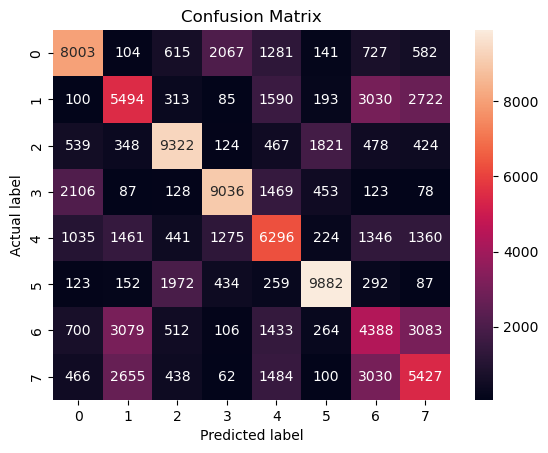

In [13]:
cm = confusion_matrix(y_dt_full_test, y_pred_dt_full)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
X_dt_wo_victim = data.drop(['Crime_Category_Code', 'Vict_Sex_M', 'Vict_Sex_X', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Vict_Age'], axis=1)  # Features
y_dt_wo_victim = data['Crime_Category_Code']

In [18]:
X_dt_wo_victim_train, X_dt_wo_victim_test, y_dt_wo_victim_train, y_dt_wo_victim_test = train_test_split(X_dt_wo_victim, y_dt_wo_victim, test_size=0.2, random_state=42)

In [19]:
dt_wo_victim_model = DecisionTreeClassifier(random_state=42)

In [20]:
dt_wo_victim_model.fit(X_dt_wo_victim_train,  y_dt_wo_victim_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.4216
              precision    recall  f1-score   support

           0       0.55      0.61      0.58     13520
           1       0.35      0.48      0.40     13527
           2       0.42      0.46      0.44     13523
           3       0.62      0.63      0.62     13480
           4       0.26      0.25      0.25     13438
           5       0.52      0.45      0.48     13201
           6       0.29      0.25      0.27     13565
           7       0.35      0.26      0.30     13662

    accuracy                           0.42    107916
   macro avg       0.42      0.42      0.42    107916
weighted avg       0.42      0.42      0.42    107916



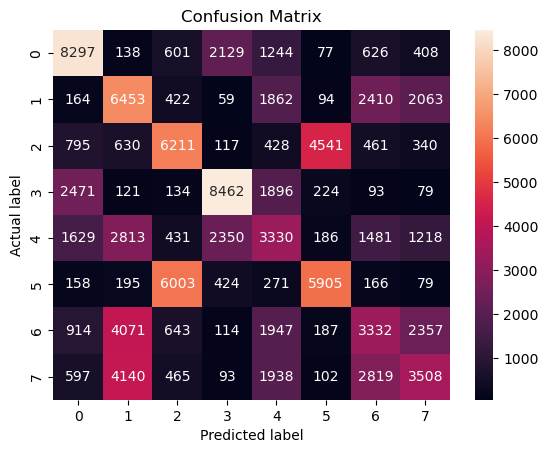

In [21]:
y_pred_wo_victim = dt_wo_victim_model.predict(X_dt_wo_victim_test)

# Accuracy
accuracy = accuracy_score(y_dt_wo_victim_test, y_pred_wo_victim)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_dt_wo_victim_test, y_pred_wo_victim))

# Confusion Matrix
cm = confusion_matrix(y_dt_wo_victim_test, y_pred_wo_victim)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
X_dt_wo_weather = data.drop(['Crime_Category_Code', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation'], axis=1) 
y_dt_wo_weather = data['Crime_Category_Code']

In [23]:
X_dt_wo_weather_train, X_dt_wo_weather_test, y_dt_wo_weather_train, y_dt_wo_weather_test = train_test_split(X_dt_wo_weather, y_dt_wo_weather, test_size=0.2, random_state=42)

In [24]:
dt_wo_weather_model = DecisionTreeClassifier(random_state=42)

In [25]:
dt_wo_weather_model.fit(X_dt_wo_weather_train,  y_dt_wo_weather_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.5396
              precision    recall  f1-score   support

           0       0.62      0.60      0.61     13520
           1       0.39      0.39      0.39     13527
           2       0.68      0.69      0.69     13523
           3       0.70      0.69      0.69     13480
           4       0.44      0.47      0.46     13438
           5       0.76      0.76      0.76     13201
           6       0.32      0.31      0.32     13565
           7       0.40      0.41      0.41     13662

    accuracy                           0.54    107916
   macro avg       0.54      0.54      0.54    107916
weighted avg       0.54      0.54      0.54    107916



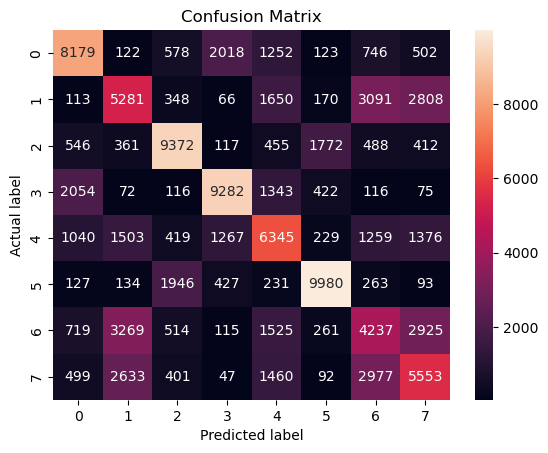

In [28]:
y_pred_wo_weather = dt_wo_weather_model.predict(X_dt_wo_weather_test)

# Accuracy
accuracy = accuracy_score(y_dt_wo_weather_test, y_pred_wo_weather)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_dt_wo_weather_test, y_pred_wo_weather))

# Confusion Matrix
cm = confusion_matrix(y_dt_wo_weather_test, y_pred_wo_weather)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
X_dt_wo_weathervictim = data.drop(['Crime_Category_Code', 'Vict_Sex_M', 'Vict_Sex_X', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Vict_Age', 'Crime_Category_Code', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation'], axis=1)  # Features

y_dt_wo_weathervictim = data['Crime_Category_Code']

In [30]:
X_dt_wo_weathervictim_train, X_dt_wo_weathervictim_test, y_dt_wo_weathervictim_train, y_dt_wo_weathervictim_test = train_test_split(X_dt_wo_weathervictim, y_dt_wo_weathervictim, test_size=0.2, random_state=42)

In [31]:
dt_wo_weathervictim_model = DecisionTreeClassifier(random_state=42)

In [32]:
dt_wo_weathervictim_model.fit(X_dt_wo_weathervictim_train,  y_dt_wo_weathervictim_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.4423
              precision    recall  f1-score   support

           0       0.59      0.66      0.63     13520
           1       0.34      0.50      0.41     13527
           2       0.47      0.45      0.46     13523
           3       0.61      0.74      0.67     13480
           4       0.24      0.15      0.19     13438
           5       0.56      0.48      0.52     13201
           6       0.30      0.26      0.28     13565
           7       0.34      0.29      0.31     13662

    accuracy                           0.44    107916
   macro avg       0.43      0.44      0.43    107916
weighted avg       0.43      0.44      0.43    107916



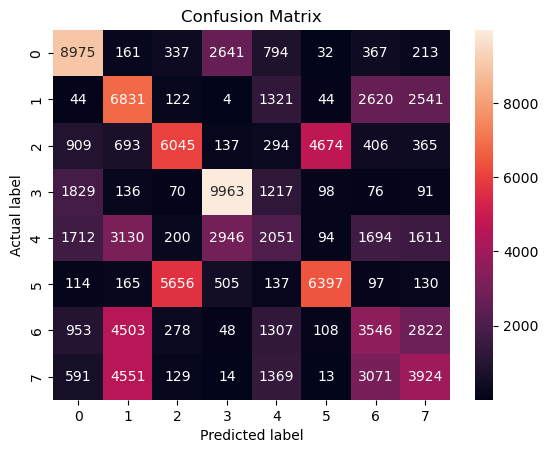

In [33]:
y_pred_wo_weathervictim = dt_wo_weathervictim_model.predict(X_dt_wo_weathervictim_test)

# Accuracy
accuracy = accuracy_score(y_dt_wo_weathervictim_test, y_pred_wo_weathervictim)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_dt_wo_weathervictim_test, y_pred_wo_weathervictim))

# Confusion Matrix
cm = confusion_matrix(y_dt_wo_weathervictim_test, y_pred_wo_weathervictim)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [48]:
def plot_feature_importances(model, features, model_name):
    # Get feature importances
    importances = model.feature_importances_
    
    # Create a DataFrame for easy plotting
    feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    
    # Sort the DataFrame by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 15))  # Set figure size
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

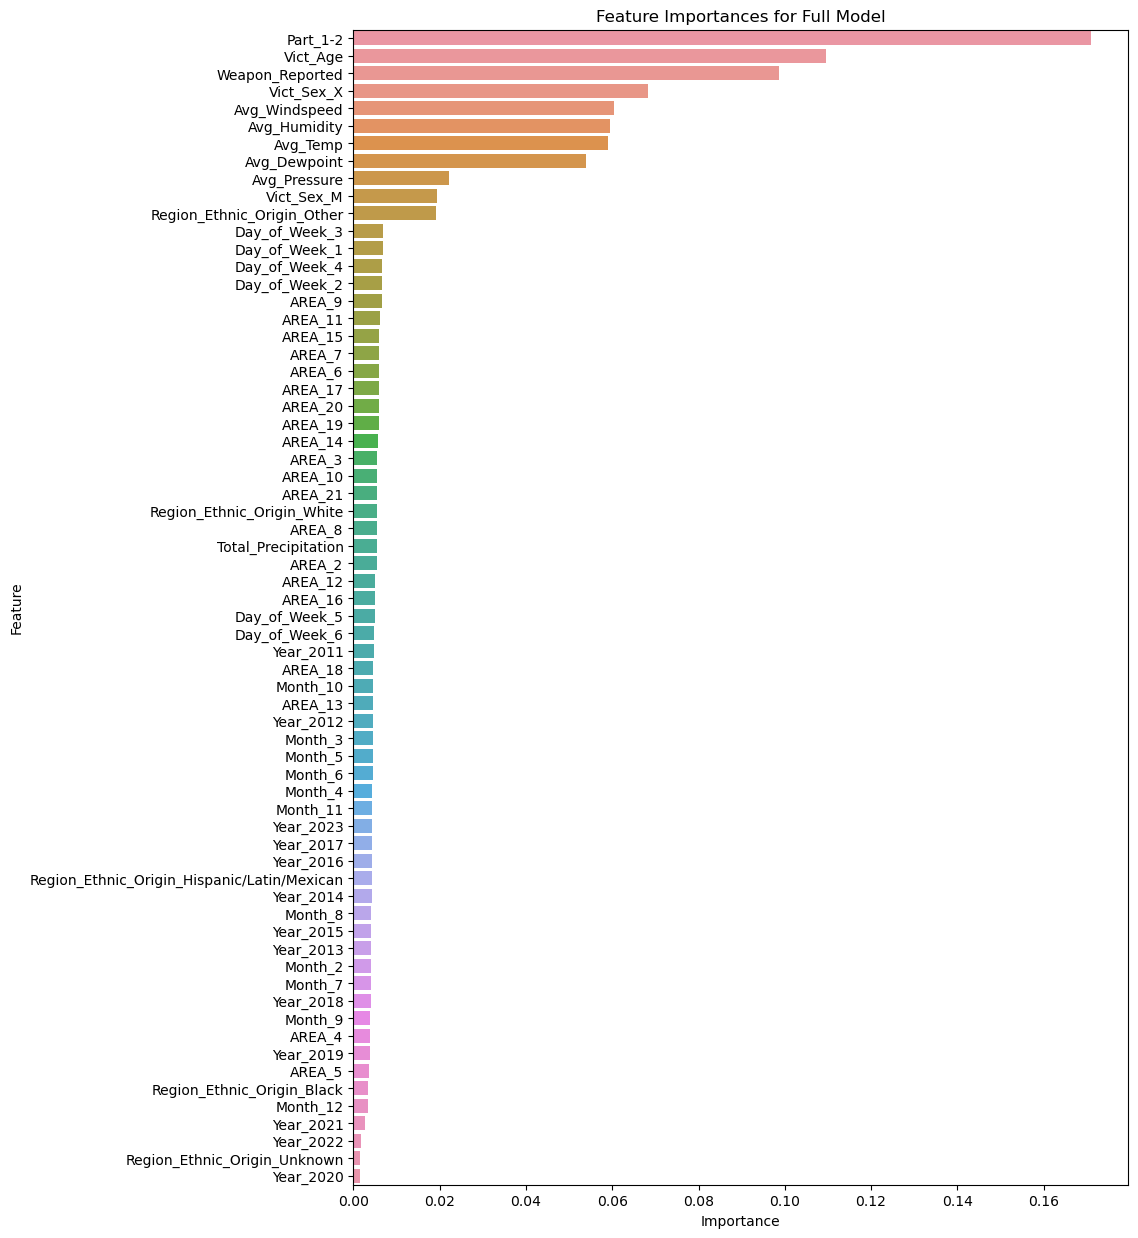

In [49]:
plot_feature_importances(dt_full_model, X_dt_full.columns, "Full Model")

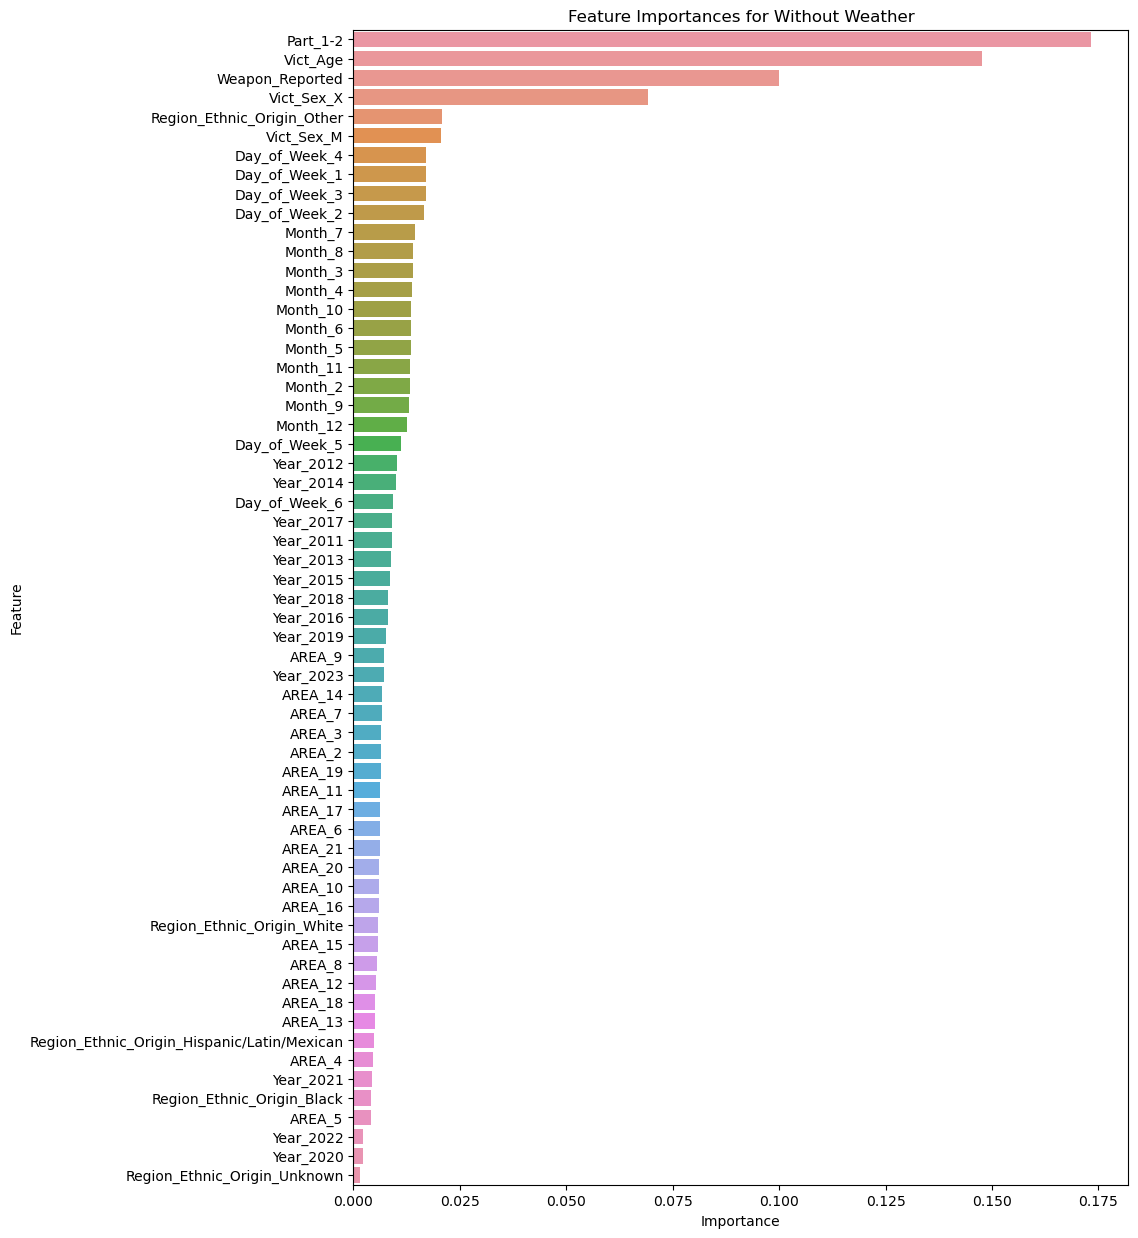

In [50]:
plot_feature_importances(dt_wo_weather_model, X_dt_wo_weather.columns, "Without Weather")

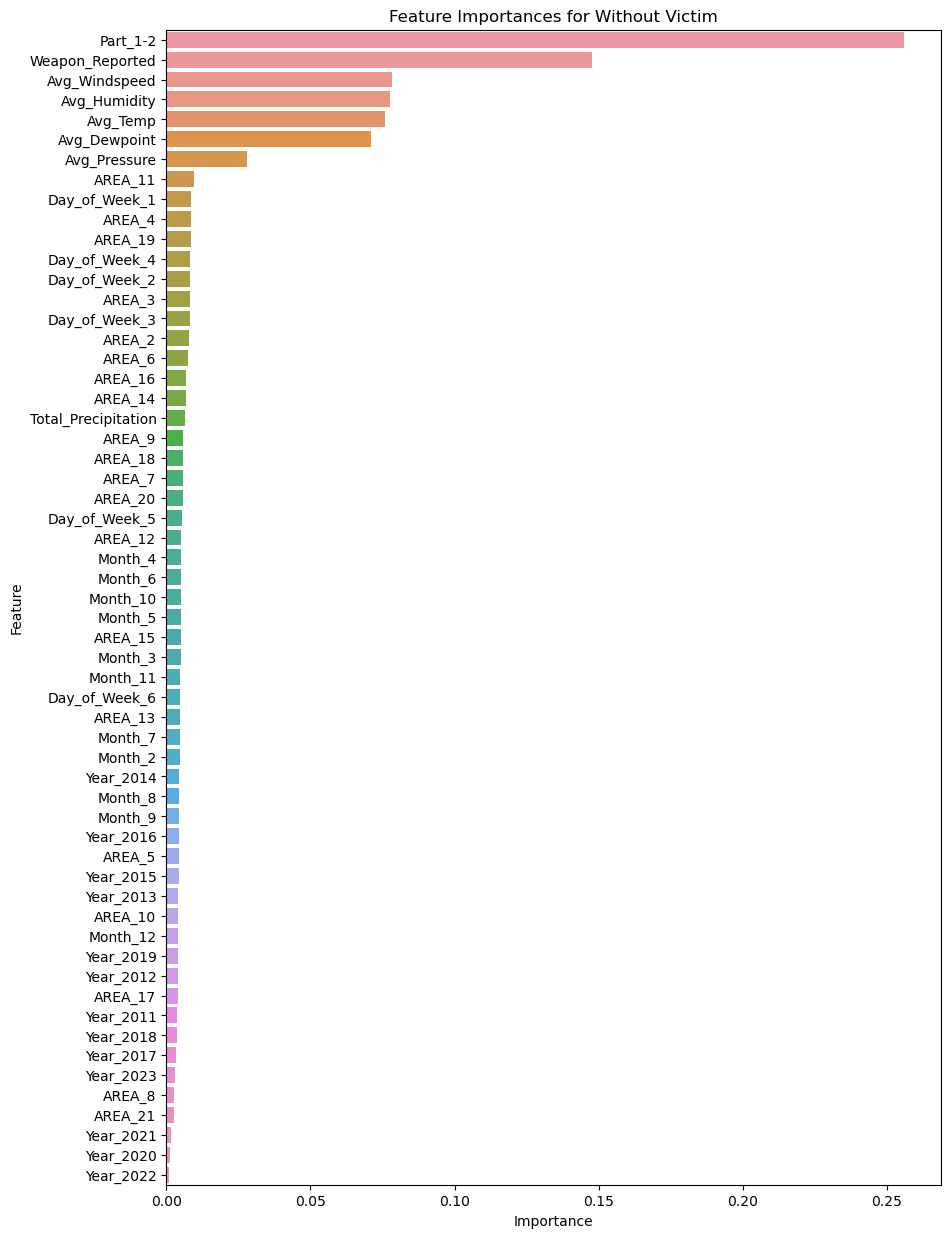

In [51]:
plot_feature_importances(dt_wo_victim_model, X_dt_wo_victim.columns, "Without Victim")

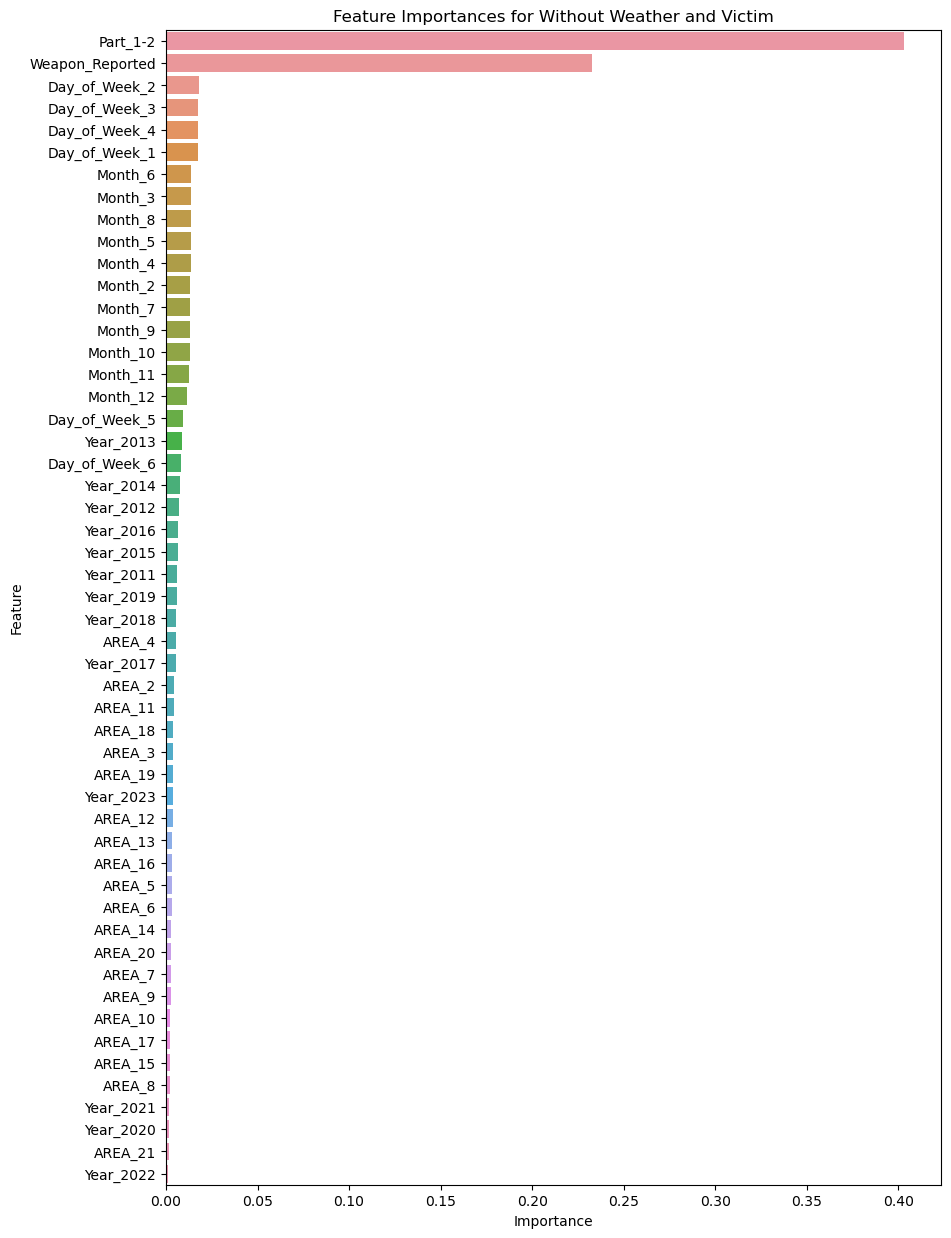

In [52]:
plot_feature_importances(dt_wo_weathervictim_model, X_dt_wo_weathervictim.columns, "Without Weather and Victim")